# Array um tipo de lista de valores

In [2]:
import numpy as np
z= 2 + 2j
np.angle(z, deg=1)  #Dentro do Numpy existe diversas rotinas matemáticas

45.0

In [28]:
A = np.array([1,2,3])
print ("A =",A)
print("\n")
B = np.array([[4,2,3], [1,5,6]])
print ("B =",B)
C = np.array("1 2 3")
print('C=\n', C)

A = [1 2 3]


B = [[4 2 3]
 [1 5 6]]
C=
 1 2 3


In [33]:
type(A)
#Número de dimensões do Array:
print("Dimensão da Matriz A -->", A.ndim) #A.ndim meio que me retorna o número de linhas  neste caso foi dimensão mas é isto
print("Forma da Matriz A -->", A.shape) #retorna a dimensão do array
print("Dimensão da Matriz B = ", B.ndim)
print("Forma da Matriz B eh  ", B.shape)


Dimensão da Matriz A --> 1
Forma da Matriz A --> (3,)
Dimensão da Matriz B = 2
Forma da Matriz B eh   (2, 3)


In [46]:
D = np.arange(15).reshape(5,3)
print('D=', D)
E = np.zeros((3,5))
print('\n E=', E)
F = np.arange(9,10,.1).reshape(2,5)
print('\n F=', F)

D= [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]

 E= [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

 F= [[9.  9.1 9.2 9.3 9.4]
 [9.5 9.6 9.7 9.8 9.9]]


# Operações com Matrizes

In [51]:
A = np.matrix([[1,2,3], [-8, 9, 10]])
B = np.matrix([[-1,12,0], [1, -9, 10]])
C = A - B
C.T
print('A transposta de C eh\n', C)

A transposta de C eh
 [[  2 -10   3]
 [ -9  18   0]]


In [52]:
A.I

matrix([[ 0.30874317, -0.08306011],
        [ 0.07103825,  0.02513661],
        [ 0.18306011,  0.01092896]])

In [53]:
X = np.matrix([],[])

# Exemplos de Aplicação com Matrizes:
    Circuito elétrico com seguintes dados:
        R = 2 ohm entre os nós 1 e 2; 
        R = 3 ohm entre os nós 2 e GND;
        R = 5 ohm entre os nós GND ou 0 e 3;
        Fonte 10V entre os nós 3 e 1;   -->> Corrente invertida de sentido
        Sentido da corrente + --> -
    
    Nó 1: +i*r1 + i*r2 = 0;
    Nó 2: -i*r2 + i*r3 = 0;
    Nó 3: -i*r1 + i*r4 = 0;
    
    Este sistema de equações será representado por matrizes a seguir (matriz incidÊncia nó ramo):
    [A]*{B} = {C}
    
    Índices: 1º -->>  Matriz = || a,b,c,d ||
             2º                || e,f,g,h ||
             3º                || i,j,l,m ||
    
    Matriz dos coeficientes:   Matriz das incógnitas:           Matriz das solução:
    A =  || 1, 1,0,0 ||           B = | i*r1 |                     C = | 0 |
         || 0,-1,1,0 ||               | i*r2 |                         | 0 |
         ||-1,0,0, 1 ||               | i*r3 |                         | 0 |
    
  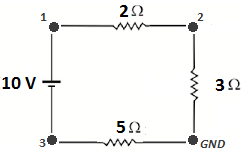
  Resolução Computacional:

In [1]:
import numpy as np
# exemplo de aplicação Análise Nodal
A = np.zeros((3,4))
A[0,0] = A[0,1]= A[1,2] = A[2,3] = 1
A[1,1]= A[2,0]= -1
A

array([[ 1.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  0.],
       [-1.,  0.,  0.,  1.]])

In [11]:
# Vetor Fonte de Corrente de ramo
Is = np.zeros((4,1)) # não tem fonte de corrente neste exemplo
# Vetor Fonte de Tensão de ramo
Vs = np.zeros((4,1))
Vs[0,0] = 10
Vs

array([[10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [12]:
# Condutâncias de ramos
G = np.zeros((4,4))
G[0,0] = 1e10
G[1,1]= 1./2
G[2,2] = 1./3
G[3,3] = 1./5
G

array([[1.00000000e+10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.33333333e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e-01]])

In [13]:
Is = np.matrix(Is)
Vs = np.matrix(Vs)
G = np.matrix(G)
A = np.matrix(A)
Gbarra = A*G*A.T
Gbarra

matrix([[ 1.00000000e+10, -5.00000000e-01, -1.00000000e+10],
        [-5.00000000e-01,  8.33333333e-01,  0.00000000e+00],
        [-1.00000000e+10,  0.00000000e+00,  1.00000000e+10]])

In [15]:
E = Gbarra.I*A*(G*Vs-Is)
E

matrix([[ 5.00004482],
        [ 3.00002245],
        [-4.999956  ]])

In [16]:
V = A.T*E
V

matrix([[10.00000083],
        [ 2.00002237],
        [ 3.00002245],
        [-4.999956  ]])

In [17]:
I=Is+G*(V-Vs)
I

matrix([[ 8.27403710e+03],
        [ 1.00001118e+00],
        [ 1.00000748e+00],
        [-9.99991201e-01]])